In [2]:
import pandas as pd
import numpy as np

In [3]:
# 1. Creating features
sales_df = pd.read_csv('./data/advertising_and_sales_clean.csv')

# Create x, an array of the values from the sales_df DataFrame's "radio" column.
x = sales_df['radio'].values

# Create y, an array of the values from the sales df DataFrame's "sales" column.
y = sales_df['sales'].values

# Reshape x into a two-dimensional NumPy array.
x = x.reshape(-1, 1)

# Print the shape of x and y.
print(x.shape)
print(y.shape)

(4546, 1)
(4546,)


In [4]:
# 2. Building a linear regression model
# Import LinearRegression.
from sklearn.linear_model import LinearRegression
# Instantiate a linear regression model.
lin_reg = LinearRegression()

# Predict sales values using x, storing as predictions.
lin_reg.fit(x, y)
predictions = lin_reg.predict(x)

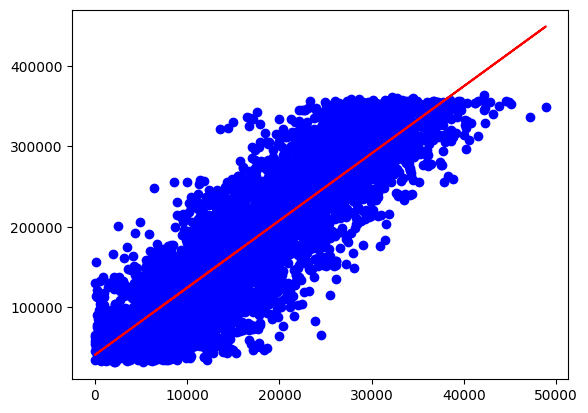

In [5]:
# 3. Visualizing a linear regression model
# Import matplotlib.pyplot as plt.
import matplotlib.pyplot as plt

# Create a scatter plot visualizing y against x, with observations in blue.
plt.scatter(x, y, color='blue')

# Draw a red line plot displaying the predictions against x.
plt.plot(x, predictions, color='red')

# Display the plot.
plt.show()

In [6]:
# 4. Fit and predict for regression
# Now you have seen how linear regression works, your task is to create a multiple linear regression
# model using all of the features in the sales_d dataset.
from sklearn.model_selection import train_test_split

# Create x, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
# Keep only the features in x (only keep 1st row)
x = sales_df.drop('influencer', axis=1).values
y = sales_df['sales'].values

# Instantiate a linear regression model.
lin_reg = LinearRegression()

# Fit the model to the training data (70% for train).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lin_reg.fit(x_train, y_train) 

# Create y_pred, making predictions for sales using the test features.
y_pred = lin_reg.predict(x_test)

In [7]:
# 5. Regression performance
# Now you have fit a model, reg, using all features from sales _df, and made predictions of sales
# values, you can evaluate performance using some common regression metrics.
# Import mean squared error.
from sklearn.metrics import mean_squared_error

# Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
r_squared = lin_reg.score(x_test, y_test)

# Calculate the model's root mean squared error using y_test and y_pred.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print r squared and rmse.
print(r_squared)
print(rmse)

1.0
8.248956547550621e-11


In [8]:
# 6. Cross validation for R-squared

# Import KFold and cross_val_score
from sklearn.model_selection import KFold, cross_val_score

# Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation using reg on x and y, passing kf to cv
cv_scores = cross_val_score(lin_reg, x, y, cv=kf)

# Print the cv_scores
print(cv_scores)

[1. 1. 1. 1. 1. 1.]


In [14]:
# 7. Analyzing cross-validation metrics

# Calculate and print the mean of the results.
mean = np.mean(cv_scores)
print("Mean:", mean)

# Calculate and print the standard deviation of cv_results
std = np.std(cv_scores)
print("Standard deviation:", std)

# Display the 95% confidence interval for your results using np.quantile()
confidence_interval = np.quantile(cv_scores, [0.025, 0.975])
print("Confidence interval:", confidence_interval)

Mean: 1.0
Standard deviation: 0.0
Confidence interval: [1. 1.]


In [18]:
# 8. Regularized regression: Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# Import Ridge
from sklearn.linear_model import Ridge

# Instantiate Ridge, setting alpha equal to alpha
ridge = Ridge(alpha=0.1)

# Fit the model to the training data
ridge.fit(x_train, y_train)

# Calculate the R^2 score for each iteration of ridge
ridge_scores = [ridge.score(x_test, y_test) for alpha in alphas]

# Print the ridge_scores
print(ridge_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [19]:
# 9. Lasso regression for feature importance:

# Import Lasso from sklearn.linear_model
from sklearn.linear_model import Lasso

# Instantiate a Lasso regressor with an alpha of 0.3
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(x_train, y_train)

# Compute the model's coefficents, strong as lasso_conf
lasso_coefs = lasso.coef_
print(lasso_coefs)

[ 1.29194973e+00  1.12183995e-03 -1.03933622e-02  6.37755103e-01]
